In [131]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [132]:
iris = load_iris()

In [133]:
df = pd.DataFrame(data= iris.data, columns=iris.feature_names)

In [134]:
df['target'] = iris.target

In [135]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [136]:
train_df = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

In [137]:
#TSNE 모델 선언, 학습
tsne= TSNE(n_components=2)
tsne_np = tsne.fit_transform(train_df)

In [138]:
tsne_df = pd.DataFrame(tsne_np, columns=['component 0', 'component 1'])

In [139]:
tsne_df.head()

,component 0,component 1
0,-10.841563,23.457439
1,-10.321783,21.123745
2,-10.867563,20.678703
3,-11.157461,20.449972
4,-10.465447,23.571728


### t-SNE 2차원 데이터 시각화

In [140]:
tsne_df['target'] = df['target']

#target별 분리
tsne_df_0 = tsne_df[tsne_df['target']==0]
tsne_df_1 = tsne_df[tsne_df['target']==1]
tsne_df_2 = tsne_df[tsne_df['target']==2]


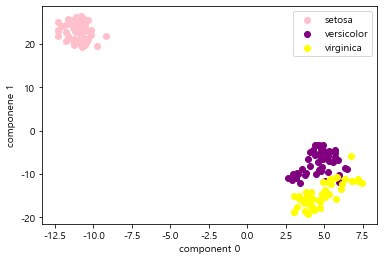

In [141]:
#target별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color='pink', label='setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color='purple', label='versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color='yellow', label='virginica')
plt.xlabel('component 0')
plt.ylabel('componene 1')
plt.legend()
plt.show()

2차원 공간에 꽃 종류별로 구분이 잘 되어 임베딩 됨

### 3차원 시각화

In [142]:
tsne = TSNE(n_components=3)
tsne_np = tsne.fit_transform(train_df)

In [143]:
tsne_df = pd.DataFrame(tsne_np, columns= ['component 0','component 1','component 2'])
tsne_df.head()

,component 0,component 1,component 2
0,-84.709343,49.924759,93.329681
1,22.033661,97.617996,31.719385
2,15.550880,132.407043,68.942001
3,43.674896,106.503548,115.097229
4,-66.300583,23.610470,62.363930


In [144]:
tsne_df['target'] = df['target']
tsne_df.head()

,component 0,component 1,component 2,target
0,-84.709343,49.924759,93.329681,0
1,22.033661,97.617996,31.719385,0
2,15.550880,132.407043,68.942001,0
3,43.674896,106.503548,115.097229,0
4,-66.300583,23.610470,62.363930,0


In [145]:
from mpl_toolkits.mplot3d import Axes3D

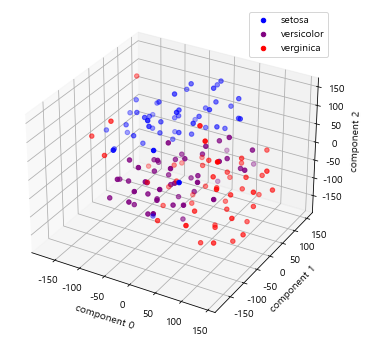

In [146]:
# 3차원 그래프 세팅
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

# 타겟별 분리
tsne_df_0 = tsne_df[tsne_df['target']==0]
tsne_df_1 = tsne_df[tsne_df['target']==1]
tsne_df_2 = tsne_df[tsne_df['target']==2]

#시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'blue', label= 'setosa')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'purple', label= 'versicolor')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'], color = 'red', label= 'verginica')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()